<a href="https://colab.research.google.com/github/scarioca/Linkedin-Learning-Courses-Downloader/blob/main/Machine_Learning_AULA_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Avaliação de Desempenho

Conjunto de Dados - Dataset COVID, FLU, COLD Symptoms - [Download](https://drive.google.com/file/d/15_WvzvIN5bjyxMttJxCt48hFPjfz2Ts_/view?usp=sharing)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import classification_report
import pandas as pd

import imblearn
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
df = pd.read_csv('/content/covid.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44453 entries, 0 to 44452
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COUGH                 44453 non-null  int64 
 1   MUSCLE_ACHES          44453 non-null  int64 
 2   TIREDNESS             44453 non-null  int64 
 3   SORE_THROAT           44453 non-null  int64 
 4   RUNNY_NOSE            44453 non-null  int64 
 5   STUFFY_NOSE           44453 non-null  int64 
 6   FEVER                 44453 non-null  int64 
 7   NAUSEA                44453 non-null  int64 
 8   VOMITING              44453 non-null  int64 
 9   DIARRHEA              44453 non-null  int64 
 10  SHORTNESS_OF_BREATH   44453 non-null  int64 
 11  DIFFICULTY_BREATHING  44453 non-null  int64 
 12  LOSS_OF_TASTE         44453 non-null  int64 
 13  LOSS_OF_SMELL         44453 non-null  int64 
 14  ITCHY_NOSE            44453 non-null  int64 
 15  ITCHY_EYES            44453 non-null

In [ ]:
df.columns

Index(['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE',
       'STUFFY_NOSE', 'FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA',
       'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'LOSS_OF_TASTE',
       'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH',
       'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE', 'TYPE'],
      dtype='object')

In [ ]:
df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY


FLU        25000
ALLERGY    16381
COVID       2048
COLD        1024
Name: TYPE, dtype: int64


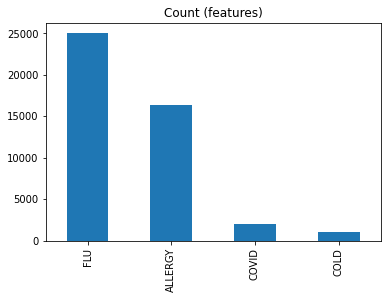

In [ ]:
#Verificando o desbalanceamento

features = df.TYPE.value_counts() #Type = gripe, alergia, covid e resfriado 
print(features)
features.plot(kind='bar', title='Count (features)');

In [ ]:
# dataset - divisão em conjunto de treino e teste 
X = df.drop('TYPE', axis=1)
y = df.TYPE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

In [ ]:
#Desbalanceamento 
print(y_train.value_counts())

FLU        20016
ALLERGY    13068
COVID       1652
COLD         826
Name: TYPE, dtype: int64


In [ ]:
# Modelo - Combinação de classificadores (VotingClassifier)

model1 = GaussianNB()
model2 = DecisionTreeClassifier()
model3 = KNeighborsClassifier(n_neighbors = 5)

modelo_ensemble = VotingClassifier(estimators=[('nb', model1),('dt', model2),('knn', model3)]) 

modelo_ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())])

In [ ]:
# Verificando o desempenho do modelo

modelo_ensemble.score(X_test, y_test)

0.8960746822629625

TESTE 1: Treinando o modelo utilizando o conjunto de treino com as classes desbalanceadas

Classification Report

[Ver Matriz de Confusão](https://pt.wikipedia.org/wiki/Matriz_de_confus%C3%A3o)

* Acurácia - performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente
* Precisão - dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas
* Recall - Revocação - dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas
* F1-Score: média harmônica entre precisão e recall

In [ ]:
#Precisão (precision) 
#Dentre todas as classificações Verdadeiros Positivos que o modelo fez, quantas estão corretas.

y_pred = modelo_ensemble.predict(X_test)

print(classification_report(y_test, y_pred)) #report


              precision    recall  f1-score   support

     ALLERGY       0.97      0.97      0.97      3313
        COLD       0.36      0.43      0.40       198
       COVID       0.26      0.34      0.30       396
         FLU       0.94      0.91      0.93      4984

    accuracy                           0.90      8891
   macro avg       0.63      0.66      0.65      8891
weighted avg       0.91      0.90      0.90      8891



TESTE 2: Treinando o modelo e aplicando a abordagem Sampling para lidar com as classes desabalanceadas

In [ ]:
# técnica under-sampling

rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_train, y_train)

In [ ]:
print(y_train.value_counts(), '\n') #divisão conjunto de dados desbalanceado

print(y_res.value_counts()) #divisão conjunto de dados após undersample

FLU        20016
ALLERGY    13068
COVID       1652
COLD         826
Name: TYPE, dtype: int64 

ALLERGY    826
COLD       826
COVID      826
FLU        826
Name: TYPE, dtype: int64


In [ ]:
y_test.value_counts() #total de amostras no conjunto de treinamento

FLU        4984
ALLERGY    3313
COVID       396
COLD        198
Name: TYPE, dtype: int64

In [ ]:
modelo_ensemble.fit(X_res, y_res) # o modelo treinado com um número pequeno de amostras por classes

y_pred = modelo_ensemble.predict(X_test) # testando as predições do modelo

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

     ALLERGY       1.00      0.96      0.98      3313
        COLD       0.48      0.95      0.64       198
       COVID       0.49      0.98      0.66       396
         FLU       1.00      0.90      0.95      4984

    accuracy                           0.93      8891
   macro avg       0.74      0.95      0.81      8891
weighted avg       0.97      0.93      0.94      8891

